Време прорачуна: t = 0.8531098365783691 sekundi


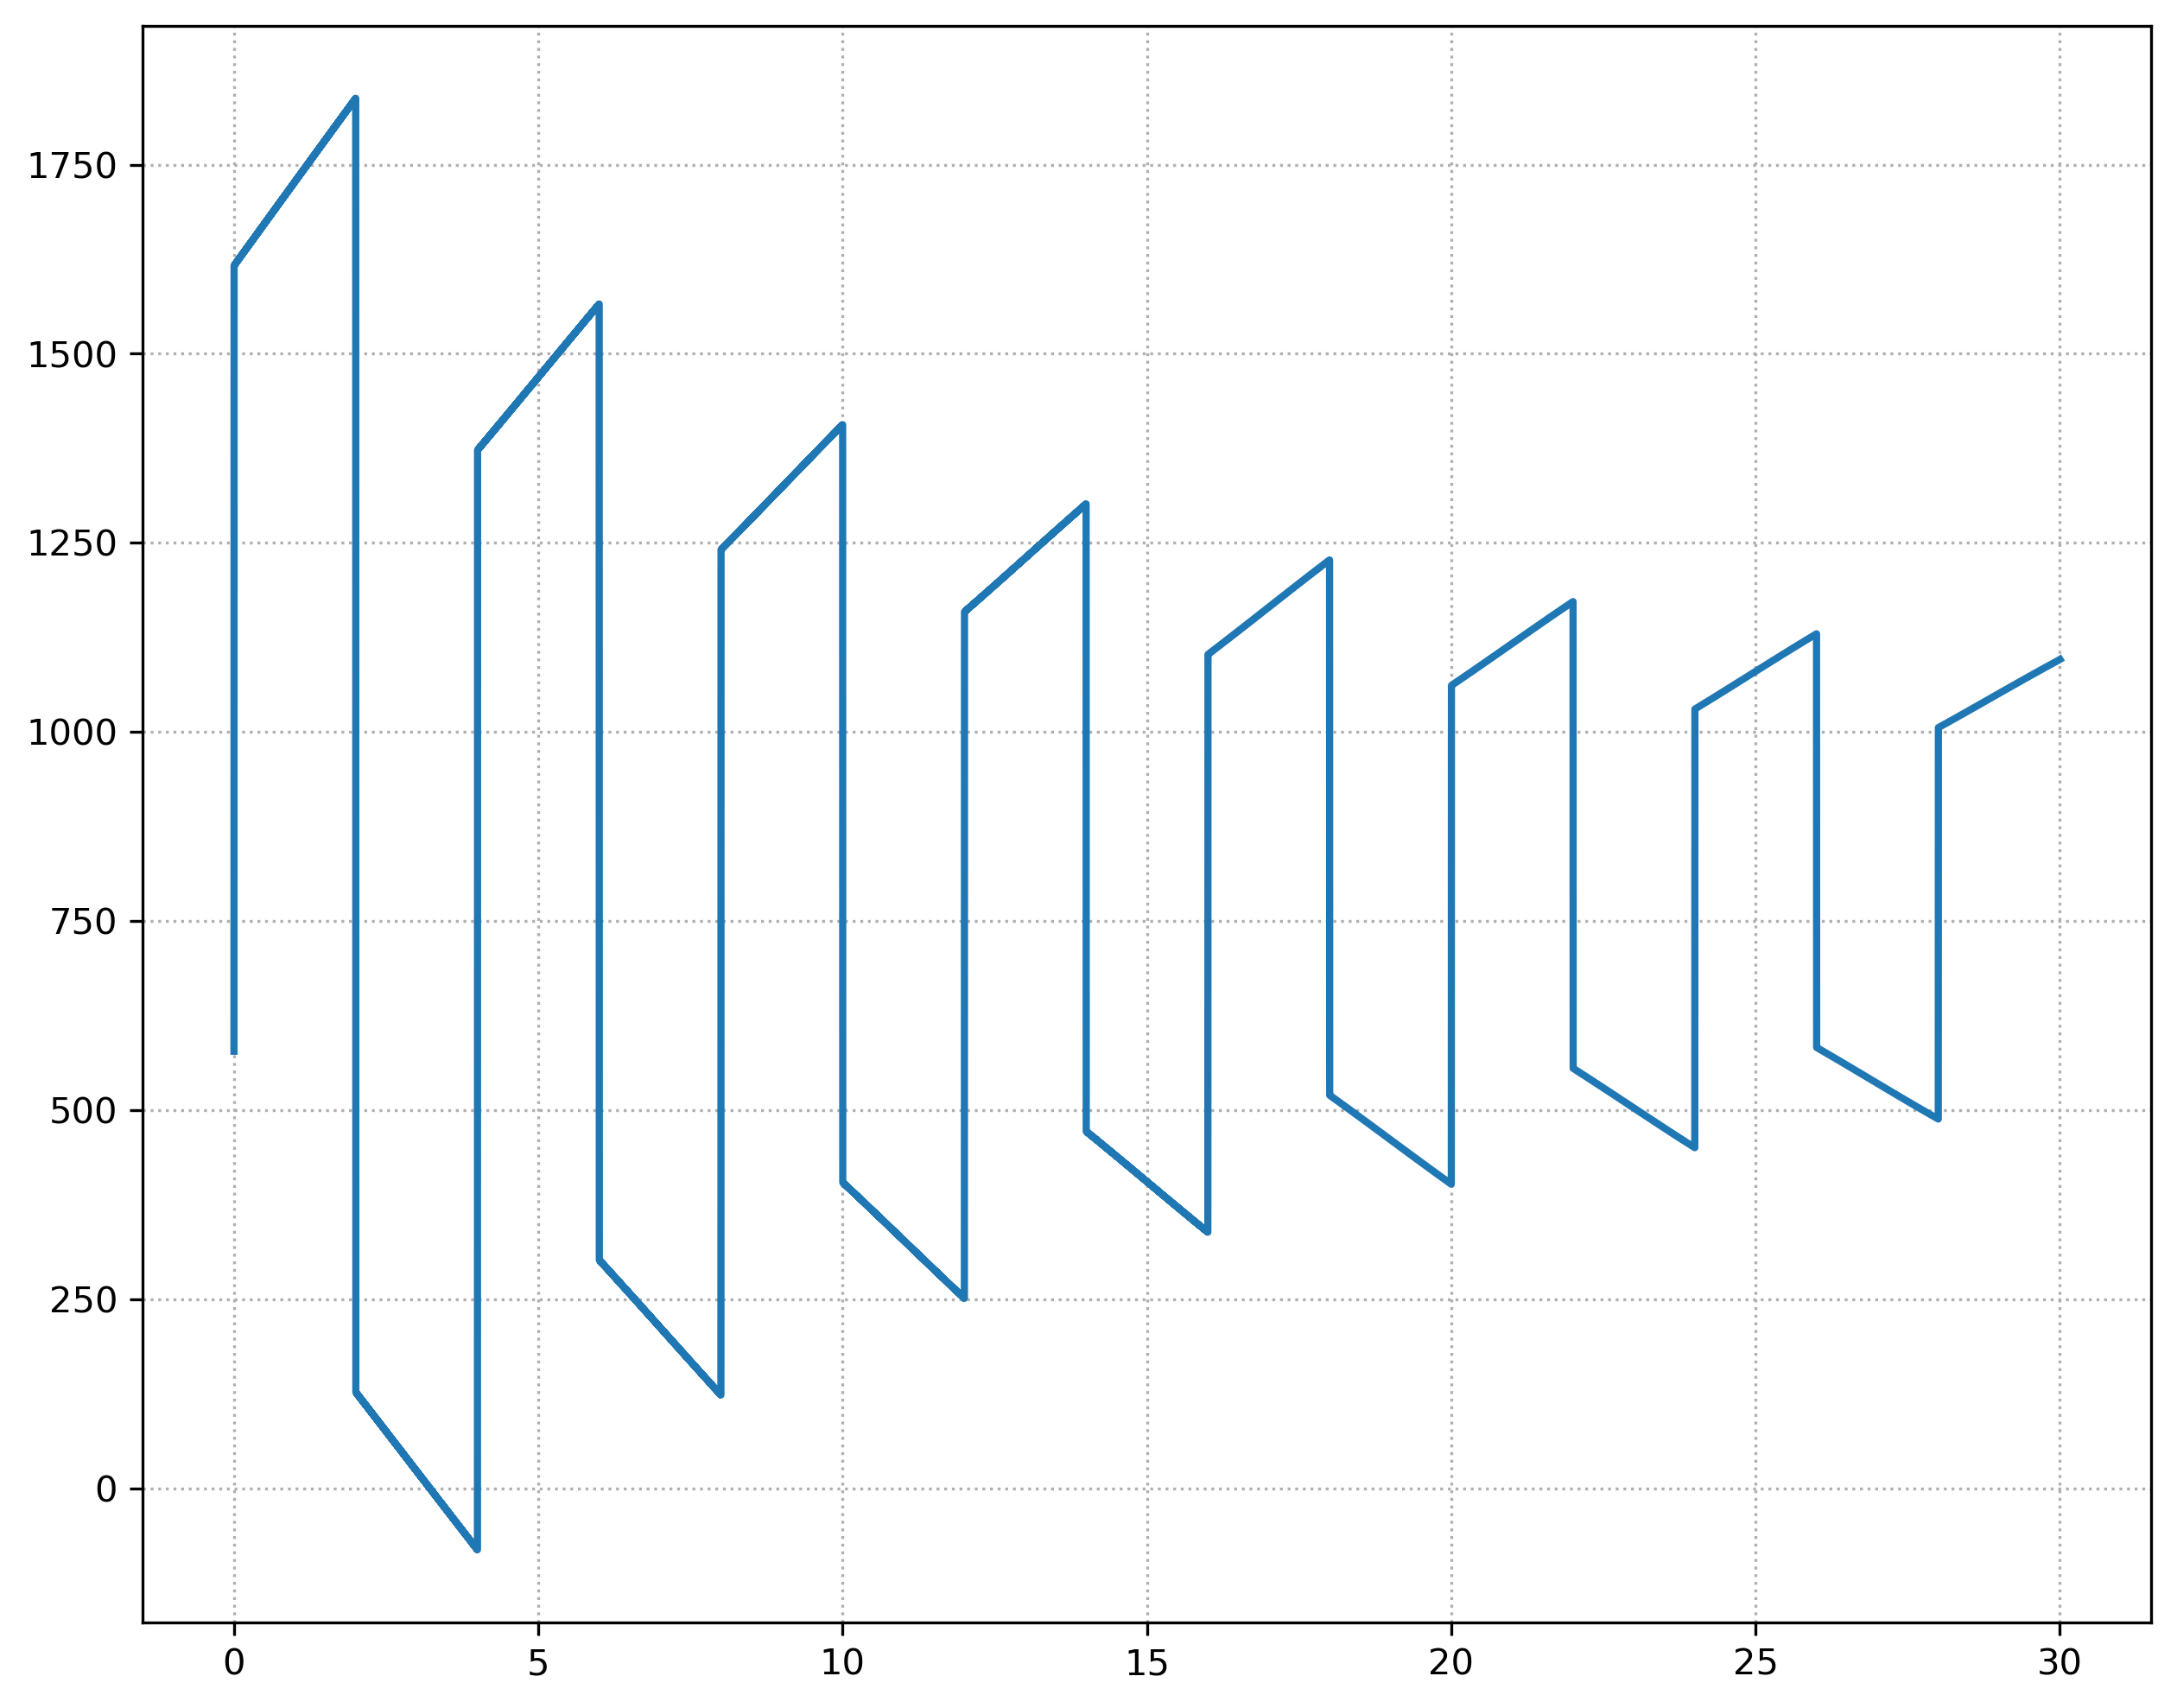

In [15]:
import numpy as np
from matplotlib import pyplot as plt
from time import time
# ----------------------------------------------------- #
#   Definisanje ulaznih velicina"""                     #
# ----------------------------------------------------- #
g = 9.8065       # ubrzanje sile Zemljine teze
ce = 1000        # brzina zvuka [m/s]
PI_R = 800       # piezometarska kota rezervoara
Q_0 = 2           # pocetna vrednost protoka
lam = 0.021     # koeficijent trenja
D = 0.5          # precnik cevi [m]
L = 1000         # duzina cevi  [m]
N = 1001         # broj proracunskih tacaka (x)
dx = L/(N-1)         # prostorni korak
Co = 1           # Courant broj
dt = Co*dx/ce    # Vremenski korak - USLOV STABILNOSTI

A = D**2 * np.pi/4    # povrsina poprecnog preseka cevi
b = ce/(g*A)
m = lam*dx/(2*g*D*A**2)
# ----------------------------------------------------- #

x = np.linspace(0, L, N)
n = N-1
# POCETNI USLOV: pre zatvaranja ventila: piezometarske kote u svim presecima #
Pi_old = PI_R - (8*lam*x/(g*D**5* np.pi**2))*Q_0**2  
# ---------------------------------------------------------------------------#

# ----------- Inicijalizacija ------- #
Pi_new = np.copy(Pi_old)
cm = np.zeros(N)
cp = np.zeros(N)
Q_old = np.full(N, Q_0, dtype='float')
Q_new = Q_old.copy()
# ------------------------------------#


# Protok nakon trenutnom zatvaranja ventila
Q = 0

# U kojim poprecnim presecima zelimo da prikazemo dijagrame 

T_count =  0  # brojac vremenskih iteracija
Nt = 30000   # broj vremenskih iteracija
Pi_ventil = []

start_time = time()
while (T_count < Nt):
    # Definisi sta se desava u ulaznom preseku cevi - karakteristika C- # 
    Pi_new[0] = PI_R;  # Prvi presek cevi - ista piezometarska kota
                               #kao i nivo u rezervoaru - UVEK                 
    cm[0] = Pi_old[1] - b*Q_old[1]  + m*Q_old[1]*np.abs(Q_old[1]) 
    Q_new[0] = 1/b*(Pi_new[0] - cm[0])
            
           
    # Definisi sta se desava kod ventila -karakteristika C+ i drugi 
    # granicni uslov Q /
    cp[n] = Pi_old[n-1] + b*Q_old[n-1] - m*Q_old[n-1]*np.abs(Q_old[n-1])
    Q_new[n] = Q;  # DRUGI GRANICNI USLOV - ventil se trenutno zatvara*/
    Pi_ventil.append(Pi_new[n])
    Pi_new[n] = cp[n] - b*Q_new[n]	
    
            
    ### --------- VEKTORIZACIJA numpy niza :-): super fast --------------- #####
    cp[1:-1] = Pi_old[0:-2] + b*Q_old[0:-2] - m*Q_old[0:-2]*np.abs(Q_old[0:-2])
    cm[1:-1] = Pi_old[2:] - b*Q_old[2:] + m*Q_old[2:]*np.abs(Q_old[2:])
    Pi_new[1:-1] = 0.5 * (cp[1:-1] + cm[1:-1])
    Q_new[1:-1] = 1/b * (Pi_new[1:-1] - cm[1:-1])
    T_count = T_count + 1
    Pi_old = Pi_new.copy()
    Q_old = Q_new.copy()     
end_time = time()      
print ("Време прорачуна: t =", end_time - start_time, "sekundi")


t = np.linspace(0, Nt*dt, Nt)
plt.figure(figsize=(10,8), dpi=300)
plt.plot(t, Pi_ventil, linewidth=2)
plt.grid(True, linestyle='dotted')